In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 50

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │           550 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,620 (6.33 KB)

 Trainable params: 1,620 (6.33 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
432/440 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0614 - loss: 3.6692
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
440/440 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0622 - loss: 3.6626 - val_accuracy: 0.2603 - val_loss: 2.4523
Epoch 2/1000
424/440 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2207 - loss: 2.5760
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2220 - loss: 2.5709 - val_accuracy: 0.5948 - val_loss: 1.7410
Epoch 3/1000
397/440 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.3522 - loss: 2.1175
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3539 - loss: 2.1114 - val_accuracy: 0.6986 - val_loss: 1.4013
Epoch 4/1000
395/440 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.3994 - loss: 1.9209
Epoch 4: saving model to model/keypoint_classifier/keypoint_cl

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.8891 - loss: 0.5056


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[8.3101410e-03 4.4093788e-02 1.4637853e-04 1.5132811e-12 7.7093823e-21
 2.1623070e-27 2.4845390e-10 0.0000000e+00 0.0000000e+00 0.0000000e+00
 4.8128894e-26 1.8287888e-26 8.6562306e-13 0.0000000e+00 1.1217795e-08
 3.2575793e-28 2.9030912e-14 7.2885138e-01 7.0771998e-21 1.6716864e-26
 2.9276396e-19 1.9748704e-15 2.7075206e-04 5.3046586e-23 2.9193123e-07
 2.1715067e-01 6.3221761e-19 2.8232730e-17 0.0000000e+00 7.7554273e-21
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.9740457e-29
 0.0000000e+00 9.1845850e-18 1.6694585e-08 0.0000000e+00 4.6983389e-12
 2.8498499e-12 1.3919359e-10 2.3738236e-05 5.0226699e-06 1.1079606e-03
 0.0000000e+00 1.0936153e-05 8.4574804e-06 4.1480125e-11 2.0396341e-05]
17


# Confusion matrix

586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step


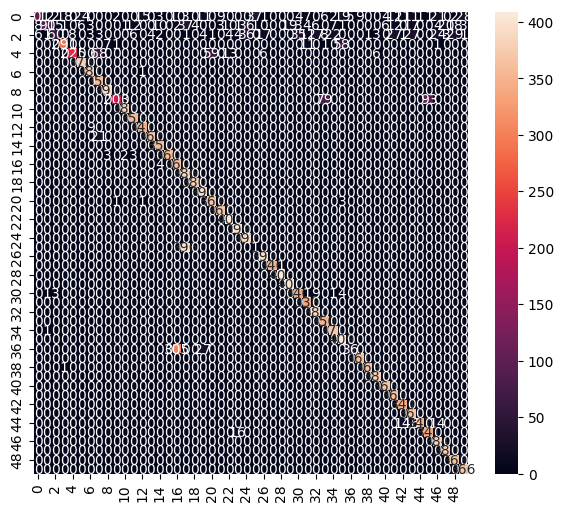

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.26      0.40       391
           1       0.86      0.25      0.39       360
           2       0.75      0.16      0.26       379
           3       0.94      0.79      0.85       370
           4       0.97      0.60      0.74       377
           5       0.93      1.00      0.96       378
           6       0.96      1.00      0.98       382
           7       0.80      1.00      0.89       358
           8       0.98      1.00      0.99       393
           9       0.98      0.54      0.70       375
          10       0.99      1.00      1.00       385
          11       0.94      1.00      0.97       355
          12       0.95      0.97      0.96       350
          13       0.99      0.95      0.97       388
          14       0.95      1.00      0.97       357
          15       1.00      0.98      0.99       368
          16       0.53      0.99      0.69       364
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Atharva\AppData\Local\Temp\tmpw6engkx1\assets


INFO:tensorflow:Assets written to: C:\Users\Atharva\AppData\Local\Temp\tmpw6engkx1\assets


Saved artifact at 'C:\Users\Atharva\AppData\Local\Temp\tmpw6engkx1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 50), dtype=tf.float32, name=None)
Captures:
  2043874899728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2043874901456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2043874901072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2043874900304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2043874899536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2043888987472: TensorSpec(shape=(), dtype=tf.resource, name=None)


8580

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.31017271e-03 4.40938659e-02 1.46378807e-04 1.51329242e-12
 7.70944044e-21 2.16232321e-27 2.48454340e-10 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.81292512e-26 1.82880222e-26
 8.65629454e-13 0.00000000e+00 1.12177938e-08 3.25760337e-28
 2.90309633e-14 7.28851318e-01 7.07725231e-21 1.67169872e-26
 2.92766128e-19 1.97487765e-15 2.70752818e-04 5.30469768e-23
 2.91931769e-07 2.17150643e-01 6.32222311e-19 2.82329382e-17
 0.00000000e+00 7.75542570e-21 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.97406766e-29 0.00000000e+00
 9.18465370e-18 1.66946137e-08 0.00000000e+00 4.69836539e-12
 2.84985468e-12 1.39193559e-10 2.37382992e-05 5.02266948e-06
 1.10796257e-03 0.00000000e+00 1.09362045e-05 8.45748764e-06
 4.14801977e-11 2.03963791e-05]
17
